In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

C:\Users\Andrew Hayman\PycharmProjects\Hybrid_Network_Models\venv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Andrew Hayman\PycharmProjects\Hybrid_Network_Models\venv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


# MNIST Model

## Data Preprocessing

In [2]:
# Load data from MNIST dataset 
training_data = torchvision.datasets.MNIST("root", train=True, download=True, transform=ToTensor())
testing_data = torchvision.datasets.MNIST("root", train=False, download=True, transform=ToTensor())

In [3]:
# Only do 0's and 1's
#training_data.data = training_data.data[training_data.targets<=1]
#training_data.targets = training_data.targets[training_data.targets<=1]

In [4]:
# Display information on datasets
print("Training data size:\t ", training_data.data.size())
print("Testing data size:\t ", testing_data.data.size())

Training data size:	  torch.Size([60000, 28, 28])
Testing data size:	  torch.Size([10000, 28, 28])


Text(0.5, 1.0, '5')

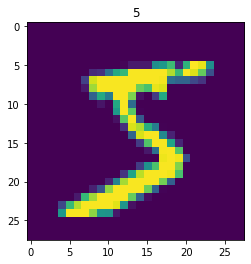

In [5]:
# Display a sample
plt.imshow(training_data.data[0])
plt.title('%i' % training_data.targets[0])

In [6]:
# Prepare subset of data and shuffle
train_dataloader = DataLoader(training_data, batch_size = 500, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size = 100, shuffle=True)

In [7]:
# Showcase dataloader information
for batch, (images, labels) in enumerate(train_dataloader): 
    print(batch)
    print(images.size())
    print(images.view(images.shape[0], -1).size())
    print(labels.size())
    break

0
torch.Size([500, 1, 28, 28])
torch.Size([500, 784])
torch.Size([500])


In [8]:
test = torch.nn.functional.one_hot(training_data.targets)
print(test[0])

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])


## Network Design and Parameters

In [9]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

dev = qml.device("projectq.simulator", wires=n_qubits)

@qml.qnode(dev, interface='torch')
def qnode_3_amplitudes(inputs, weights):
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.RY(inputs[2], wires=2)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])
    
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.RY(weights[2], wires=2)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2))

weight_shapes = {"weights": 3}
qlayer_3_amplitudes = qml.qnn.TorchLayer(qnode_3_amplitudes, weight_shapes)

qlayer_3_amplitudes(torch.Tensor([1,3,3]))

tensor([-0.9248, -0.0444, -0.5679], grad_fn=<ToCopyBackward0>)

In [10]:
n_qubits = 4
#dev = qml.device("default.qubit", wires=n_qubits)
dev = qml.device("forest.qvm", device="{}q-pyqvm".format(n_qubits))

@qml.qnode(dev, interface='torch')
def qnode_4_amplitudes(inputs, weights):
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.RY(inputs[2], wires=2)
    qml.RY(inputs[3], wires=3)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 3])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[1, 3])
    qml.CNOT(wires=[2, 3])
    
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.RY(weights[2], wires=2)
    qml.RY(weights[3], wires=3)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))

weight_shapes = {"weights": 4}
qlayer_4_amplitudes = qml.qnn.TorchLayer(qnode_4_amplitudes, weight_shapes)

qlayer_4_amplitudes(torch.Tensor([1,3,3,4]))

C:\Users\Andrew Hayman\PycharmProjects\Hybrid_Network_Models\venv\lib\site-packages\pyquil\api\_compiler.py:480: UserWarning: Request to quilc at tcp://127.0.0.1:5555 timed out. This could mean that quilc is not running, is not reachable, or is responding slowly.. Compilation using quilc will not be available.
  warnings.warn(f"{e}. Compilation using quilc will not be available.")


tensor([ 0.3180,  0.5340, -0.5940,  0.4340], grad_fn=<ToCopyBackward0>)

In [11]:
n_qubits = 5
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='torch')
def qnode_5_amplitudes(inputs, weights):
    
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    qml.Hadamard(wires=4)
    
    qml.RY(inputs[0], wires=0)
    qml.RY(inputs[1], wires=1)
    qml.RY(inputs[2], wires=2)
    qml.RY(inputs[3], wires=3)
    qml.RY(inputs[4], wires=4)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 3])
    qml.CNOT(wires=[0, 4])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[1, 3])
    qml.CNOT(wires=[1, 4])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[2, 4])
    qml.CNOT(wires=[3, 4])
    
    qml.RY(weights[0], wires=0)
    qml.RY(weights[1], wires=1)
    qml.RY(weights[2], wires=2)
    qml.RY(weights[3], wires=3)
    qml.RY(weights[4], wires=4)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3)), qml.expval(qml.PauliZ(4))

weight_shapes = {"weights": 5}
qlayer_5_amplitudes = qml.qnn.TorchLayer(qnode_5_amplitudes, weight_shapes)

qlayer_5_amplitudes(torch.Tensor([1,3,3,5,5]))

tensor([ 0.8413,  0.0076, -0.0107, -0.0928,  0.3605],
       grad_fn=<ToCopyBackward0>)

In [12]:
from itertools import combinations
lst = list(range(0,10))
print(lst)
i=0
for combo in combinations( list(range(0,10)), 3): 
    print(combo)
    i +=1
    
print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 5, 6)
(0, 5, 7)
(0, 5, 8)
(0, 5, 9)
(0, 6, 7)
(0, 6, 8)
(0, 6, 9)
(0, 7, 8)
(0, 7, 9)
(0, 8, 9)
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 2, 6)
(1, 2, 7)
(1, 2, 8)
(1, 2, 9)
(1, 3, 4)
(1, 3, 5)
(1, 3, 6)
(1, 3, 7)
(1, 3, 8)
(1, 3, 9)
(1, 4, 5)
(1, 4, 6)
(1, 4, 7)
(1, 4, 8)
(1, 4, 9)
(1, 5, 6)
(1, 5, 7)
(1, 5, 8)
(1, 5, 9)
(1, 6, 7)
(1, 6, 8)
(1, 6, 9)
(1, 7, 8)
(1, 7, 9)
(1, 8, 9)
(2, 3, 4)
(2, 3, 5)
(2, 3, 6)
(2, 3, 7)
(2, 3, 8)
(2, 3, 9)
(2, 4, 5)
(2, 4, 6)
(2, 4, 7)
(2, 4, 8)
(2, 4, 9)
(2, 5, 6)
(2, 5, 7)
(2, 5, 8)
(2, 5, 9)
(2, 6, 7)
(2, 6, 8)
(2, 6, 9)
(2, 7, 8)
(2, 7, 9)
(2, 8, 9)
(3, 4, 5)
(3, 4, 6)
(3, 4, 7)
(3, 4, 8)
(3, 4, 9)
(3, 5, 6)
(3, 5, 7)
(3, 5, 8)
(3, 5, 9)
(3, 6, 7)
(3, 6, 8)
(3, 6, 9)

In [13]:
# Define neural network 
# Great source: https://pennylane.ai/qml/demos/tutorial_qnn_module_torch.html
# Note that in_channels = 1 because the input is a grayscale image
from itertools import combinations


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.main = nn.Sequential(
            nn.Linear(in_features=784, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
        )
        
        self.final = nn.Sequential(nn.Linear(in_features=360, out_features=64),
                                    nn.ReLU(),
                                    nn.Linear(in_features=64, out_features=10),
                                    nn.LogSoftmax(dim=1))
    

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.main(x)
        x_split = torch.split(x, 1, dim=1)
        x_split = list(x_split)

        x_out = []
        
        i=0
        for combo in combinations(list(range(0,10)), 3):
            i+=1
            print("combo", i)
            x_temp = torch.cat([x_split[combo[0]], x_split[combo[1]], x_split[combo[2]]], dim=1)
            x_temp = qlayer_3_amplitudes(x_temp)
            x_out.append(x_temp)
        
        x = torch.cat(x_out, dim=1)
        x = self.final(x)
        return x

In [14]:
# View neural network 
model = Net()
#test = training_data.data[0:100]
#test = test.view(-1, 784)
#test = test/2.0
#y = model.forward(test)
#print(y)

In [15]:
#from torchsummary import summary
#summary(model, (1, 28, 28))

## Training the Model

In [16]:
# Define training routine
import time

def train(epochs):
    epoch_list = []
    accuracy_list = []
    loss_list = []
    for epoch in range(1, epochs+1):
        accuracy = 0
        running_loss = 0

        for batch_idx, (image, labels) in enumerate(train_dataloader):
            start = time.time()
            output = model(image)                           # Find network output
            loss = loss_function(output, labels)              # Compute loss

            predicted = torch.max(output.data, 1)[1]          # Find predicted value
            batch_corr = (predicted == labels).sum()          # Find number of correct values
            batch_accuracy = (100*batch_corr / len(labels))    
            accuracy+=batch_accuracy/120
            running_loss += loss.item()

            optimizer.zero_grad()                             # Clear gradients for this training step
            loss.backward()                                   # Compute gradients from backpropagation 
            optimizer.step()                                  # Apply changes from gradients
            end = time.time()
            print("Batch accuracy: %.2f Time: %.2f" % (batch_accuracy, (end - start)))

        print("Training accuracy: %.2f \t Training loss: %.2f " % (accuracy, running_loss))
        epoch_list.append(epoch)
        accuracy_list.append(accuracy)
        loss_list.append(running_loss)
    return epoch_list, accuracy_list, loss_list
        

In [ ]:
# Run training
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs, accuracy, loss = train(epochs=10)

combo 1
combo 2
combo 3
combo 4
combo 5
combo 6
combo 7
combo 8
combo 9
combo 10
combo 11
combo 12
combo 13
combo 14
combo 15
combo 16
combo 17
combo 18
combo 19
combo 20
combo 21
combo 22
combo 23
combo 24
combo 25
combo 26
combo 27
combo 28
combo 29
combo 30
combo 31
combo 32
combo 33
combo 34
combo 35
combo 36
combo 37
combo 38
combo 39
combo 40
combo 41
combo 42
combo 43
combo 44
combo 45
combo 46
combo 47
combo 48
combo 49
combo 50
combo 51
combo 52
combo 53
combo 54
combo 55
combo 56
combo 57
combo 58
combo 59
combo 60
combo 61
combo 62
combo 63
combo 64
combo 65
combo 66
combo 67
combo 68
combo 69
combo 70
combo 71
combo 72
combo 73
combo 74
combo 75
combo 76
combo 77
combo 78
combo 79
combo 80
combo 81
combo 82
combo 83
combo 84
combo 85
combo 86
combo 87
combo 88
combo 89
combo 90
combo 91
combo 92
combo 93
combo 94
combo 95
combo 96
combo 97
combo 98
combo 99
combo 100
combo 101
combo 102
combo 103
combo 104
combo 105
combo 106
combo 107
combo 108
combo 109
combo 110
combo 11

In [ ]:
plt.plot(epochs, accuracy)

In [ ]:
plt.plot(epochs, accuracy)

## Testing the Model

In [ ]:
def test(): 
    accuracy = 0
    with torch.no_grad(): 
        for image, labels in enumerate(test_dataloader): 
            output = network(image)
            predicted = torch.max(output.data, 1)[1]
            accuracy += (100*(predicted == labels).sum() / len(labels))
    print("Accuracy: ", accuracy)

In [ ]:
test()

# Network Class

In [ ]:
class NN: 

In [ ]:
train_losses = []
train_counter = [] 
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
log_interval = 10

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), '/results/model.pth')
            torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [ ]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()